In [125]:
from typing import List

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
plt.ion()

In [136]:
NUM_EPISODES = 300000
START_STATE = 500
ALPHA_AGGR = 2e-5
ALPHA_LINEAR = 2e-5
        

<h1> Implementation of 1000 state random walk with equiprobable jump of 100 states on both sides and its solution using state aggregation and linear function approximation <h1>

In [138]:
q_aggr = np.zeros(10)
theta1 = 0.
theta2 = 0.
all_states = []
thetas = []
for i in range(NUM_EPISODES):
    current_state = START_STATE
    states = []
    ret = 0
    while True:
        states.append(current_state)
        all_states.append(current_state)
        right = current_state + 100
        left = current_state - 100
        if np.random.rand() > 0.5:
            current_state = np.random.randint(current_state+1,right+1)
            if current_state > 1000:
                ret = 1
                break
        else:
            current_state = np.random.randint(left,current_state)
            if current_state < 1:
                ret = -1
                break      
        states.append(current_state)
    for state in states:
        idx = (state - 1) // 100
        q_aggr[idx] = q_aggr[idx] + ALPHA_AGGR * (ret - q_aggr[idx])
    for state in states:
        state = state / 1000.
        theta1 = theta1 + ALPHA_LINEAR * (ret - (theta1*state)-theta2) * state
        theta2 = theta2 + ALPHA_LINEAR * (ret - (theta1*state)-theta2)
        thetas.append((ret - (theta1*state)-theta2)**2)

<h1> Plot the value function and state distribution for both state aggregation and linear function approximation </h1>

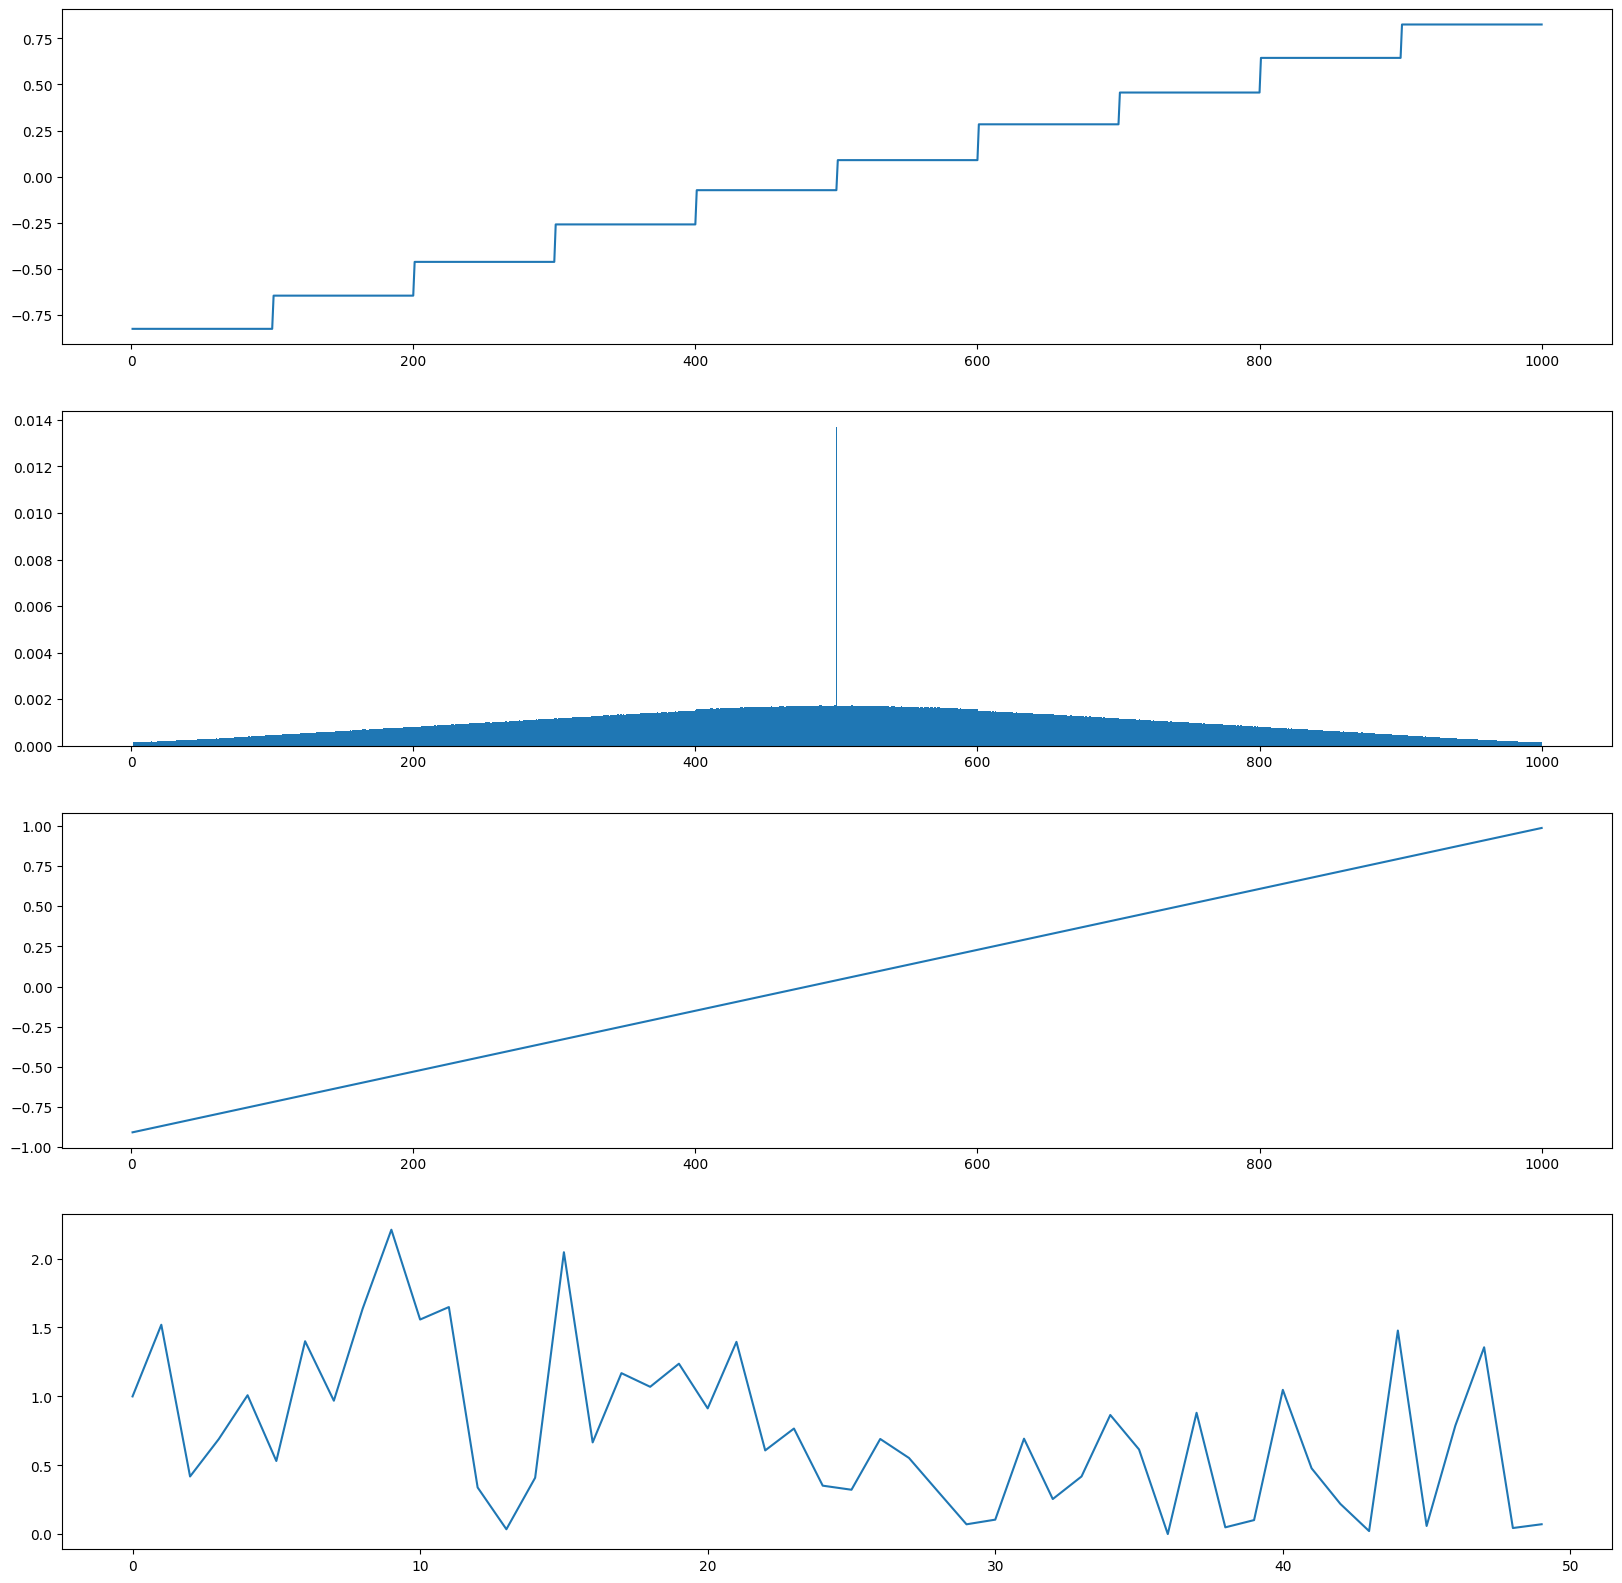

In [141]:
fig:Figure = plt.figure(figsize=(20,20))
ax:List[Axes] = fig.subplots(4,1)
x_axis = np.arange(1,1001)
y_axis = [ theta1*x/1000.+theta2 for x in x_axis]
q_rep = [ q_val for q_val in q_aggr for _ in range(100)]
ax[0].plot(x_axis,q_rep)
ax[1].hist(all_states,bins=1000,density=True)
ax[2].plot(x_axis,y_axis);
ax[3].plot(thetas[0:-1:1000000])

In [142]:
theta1,theta2

(1.8954859682985503, -0.9089910106600901)